# Business Case

### Predict the total count of bikes given on rent per hour.

Bike sharing systems are a new version of traditional bike rentals where the whole process from membership, rental and return back has been automated. Through these systems, users are easily able to rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 


Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns the bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of the important events in the city could be detected via monitoring these data.

## Domain Analysis

* Here we have data of 2 years.
* Here we predict the count of bikes given on rent based on different conditions like instant, dteday, season, hr, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt.
* Here the cnt is our target variable

In [1]:
# import important libraries 
import pandas as pd  # used for load the data, manipulation of data,data cleaning & analysis
import numpy as np  # used for numerical function
import seaborn as sns  # use for data visualization
import matplotlib.pyplot as plt  # use for data visualization
import warnings  # use for ignore the warnings
warnings.filterwarnings('ignore')

In [121]:
# load the data set
data = pd.read_csv('hour.csv')
data

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]

In [3]:
data.columns  # shows the all features of dataset

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Feature Information

**instant** : it shows the index for every rows.\
**dteday** : The date of the observation.\
**season** : It shows the season in which the observation was made.\
**yr** : It shows the year of the observation.\
**mnth** : It shows the month of observation.\
**hr** : The hour of the day.\
**holiday** : It shows the whether the day is holiday.\
**weekday** : It shows the day of week.\
**workingday** : It shows that whether the day is working day.\
**weathersit** : It shows the weather situation.\
**temp** : It shows the temperature in celsius.\
**atemp** : It shows the feels like temperature in celsius.\
**hum** : It shows the humidity.\
**windspeed** : It shows the speed of wind.\
**casual** : It is show the non-registered users.\
**registered** : It is show the registered users.\
**cnt** : The total count of users.\

## Basic Checks

In [4]:
data.info()  # gives information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insights**
* Here we can not see any null values in any columns.
* Here we can see the total 17379 rows and 17 columns in the dataset.
* Here we can see the total float datatype column is 4 and total int datatype column is 12.
* Here we can see the total storage of data is 91.5 kb.
* Here we can see the total object datatype column is 1.
     * Here we should change the dteday column datatype object to datetime64.

In [5]:
data.head()  # shows the first 5 rows

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [6]:
data.tail()  # shows the last 5 rows

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49

In [7]:
data.describe()  # describe the statistical information for continuous column

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

**Insights**
* Here we can see there is no null values in any columns.
* Here we can see the max temp is 1.0 and min temp is 0.0 and the max windspeed is 0.85.
* Here we can see the min season is 1 and max season is 4.
* Here we can see the weekday in 0 to 6 and weathersit min to max is 1 to 4.
* Here we can see the instant column have all unique value so this column is not important, we drop this column.

In [8]:
data.describe(include='O')  # describe the categorical columns

dteday
count        17379
unique         731
top     2011-01-01
freq            24

**Insights**
* Here we can see that the date column should have datetime datatype. so we convert it in datetime datatype.

In [122]:
# import datetime
from datetime import datetime as dt
data['dteday'] = data['dteday'].astype('datetime64[ns]')  # convert the datatype object to datetime

In [123]:
data['dteday']

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: dteday, Length: 17379, dtype: datetime64[ns]

**In the dataset, we have year and month features, so we just need day. We take a day from the dteday column and make a new feature 'day' and drop the dteday column.**

In [124]:
data['day'] = pd.to_datetime(data.dteday).dt.day   #create a day column

In [125]:
data['day']

0         1
1         1
2         1
3         1
4         1
         ..
17374    31
17375    31
17376    31
17377    31
17378    31
Name: day, Length: 17379, dtype: int32

In [8]:
data.head()  # shows the first 5 rows

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  day  
0           1  0.24  0.2879  0.81        0.0       3          13   16    1  
1           1  0.22  0.2727  0.80        0.0       8          32   40    1  
2           1  0.22  0.2727  0.80        0.0       5          27   32    1  
3           1  0.24  0.2879  0.75        0.0       3          10   13    1  
4           1  0.24  0.2879  0.75        0.0       0           1    1    1

## EDA : Exploratory Data Analysis

EDA is the process of analyzing and visualizing datasets.
* there are three type of EDA:
  1. Univariante Analysis
  2. Biavariante Analysis
  3. Multivariante Analysis

In [126]:
data.drop(['instant','dteday'],axis=1,inplace=True)  # drop the instant and dteday column
data

season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0           1   0     1   0        0        6           0           1  0.24   
1           1   0     1   1        0        6           0           1  0.22   
2           1   0     1   2        0        6           0           1  0.22   
3           1   0     1   3        0        6           0           1  0.24   
4           1   0     1   4        0        6           0           1  0.24   
...       ...  ..   ...  ..      ...      ...         ...         ...   ...   
17374       1   1    12  19        0        1           1           2  0.26   
17375       1   1    12  20        0        1           1           2  0.26   
17376       1   1    12  21        0        1           1           1  0.26   
17377       1   1    12  22        0        1           1           1  0.26   
17378       1   1    12  23        0        1           1           1  0.26   

        atemp   hum  windspeed  casual  registered  cnt  day  
0      0.2879  0.81     0.0000       3          13   16    1  
1      0.2727  0.80     0.0000       8          32   40    1  
2      0.2727  0.80     0.0000       5          27   32    1  
3      0.2879  0.75     0.0000       3          10   13    1  
4      0.2879  0.75     0.0000       0           1    1    1  
...       ...   ...        ...     ...         ...  ...  ...  
17374  0.2576  0.60     0.1642      11         108  119   31  
17375  0.2576  0.60     0.1642       8          81   89   31  
17376  0.2576  0.60     0.1642       7          83   90   31  
17377  0.2727  0.56     0.1343      13          48   61   31  
17378  0.2727  0.65     0.1343      12          37   49   31  

[17379 rows x 16 columns]

In [10]:
con_col = data[['temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt']]  # define variable for continuous column

### 1. Univariante Analysis

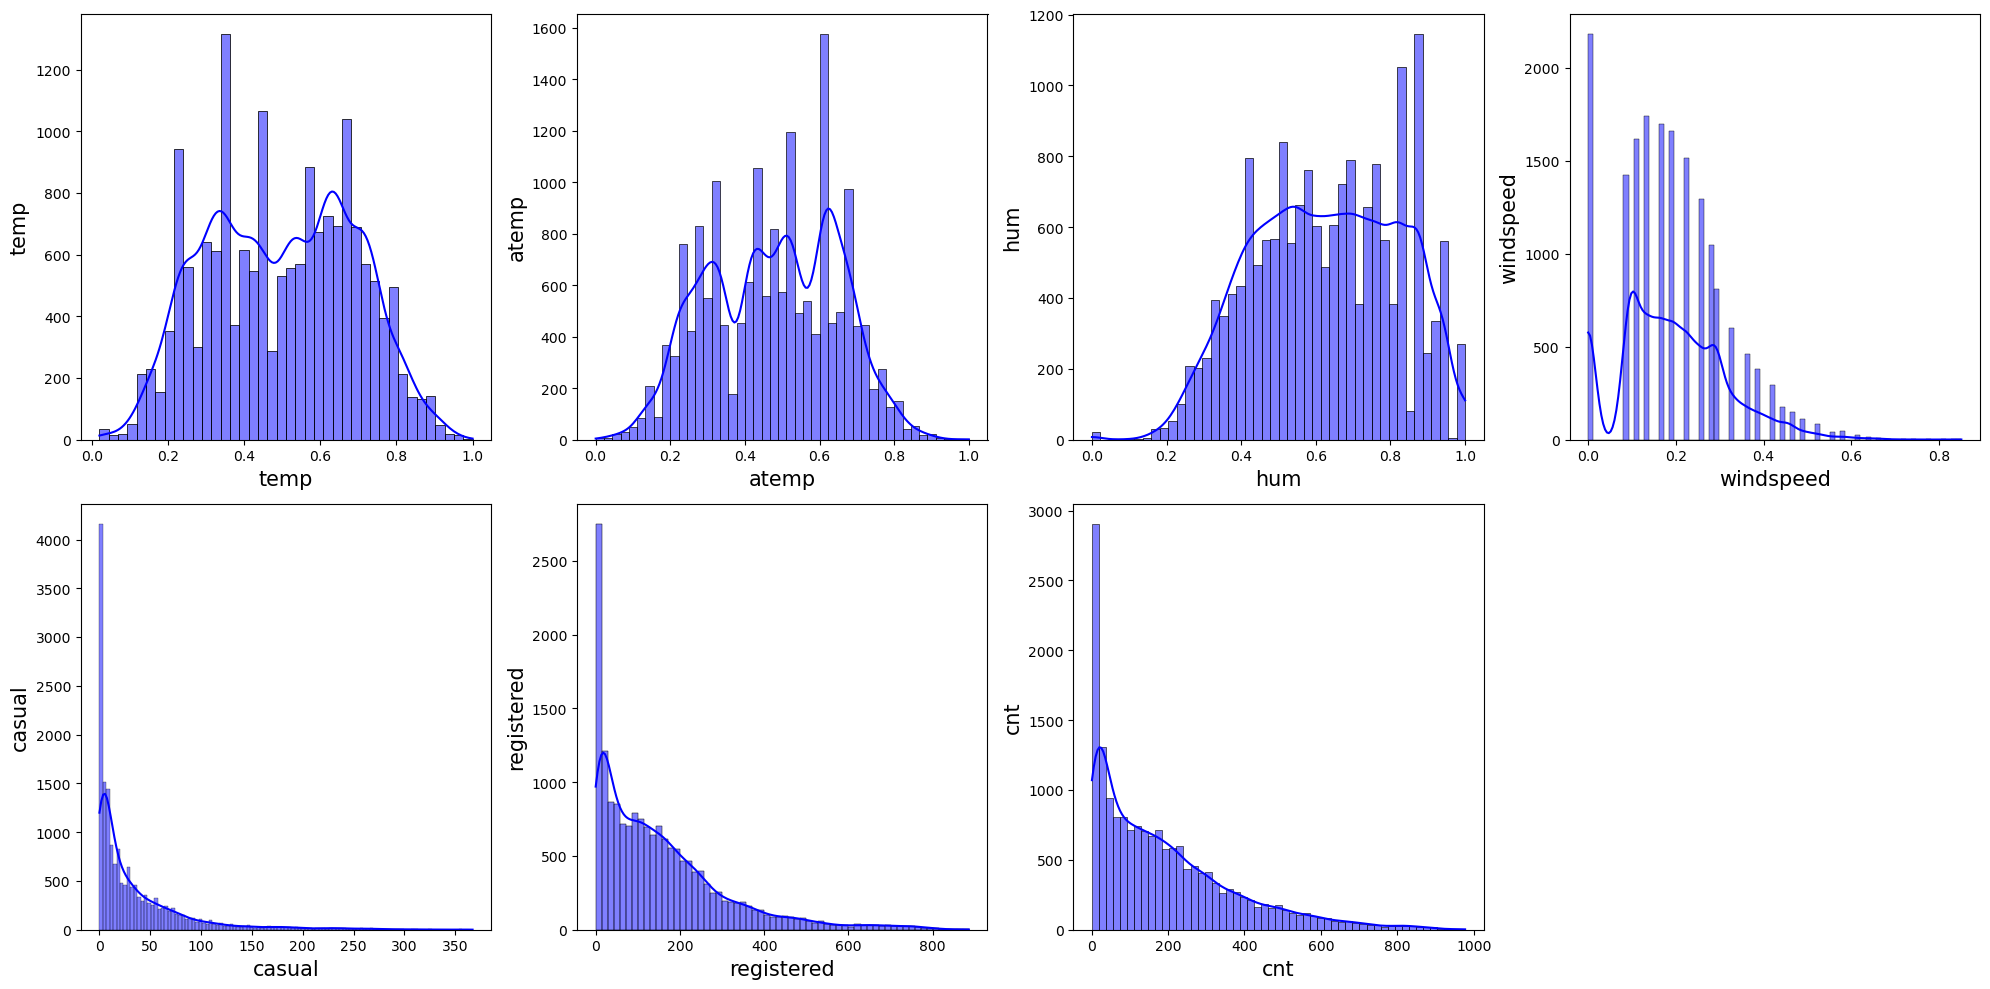

In [16]:
plt.figure(figsize=(20,10),facecolor='white')  # define the plot size
plt_num=1 
for i in con_col:  #define for loop
    if plt_num <= 8 :  # if condition
        plt.subplot(2,4,plt_num)  #assign the row and column
        sns.histplot(data[i],kde=True,color='b')  #create a histogram plot
        plt.xticks(fontsize=10)  # define the xticks size
        plt.yticks(fontsize=10)  # define the yticks size
        plt.xlabel(i,fontsize=15)  # assign the xlabel value
        plt.ylabel(i,fontsize=15)  # assign the xlabel value
        plt_num += 1  # increment of 1
plt.tight_layout() # use for show the data

**Insights**
* Here we are use histogram plot for in continuous column.
* Here we can not see the normal distribution in any columns.

### 2. Biavariante Analysis

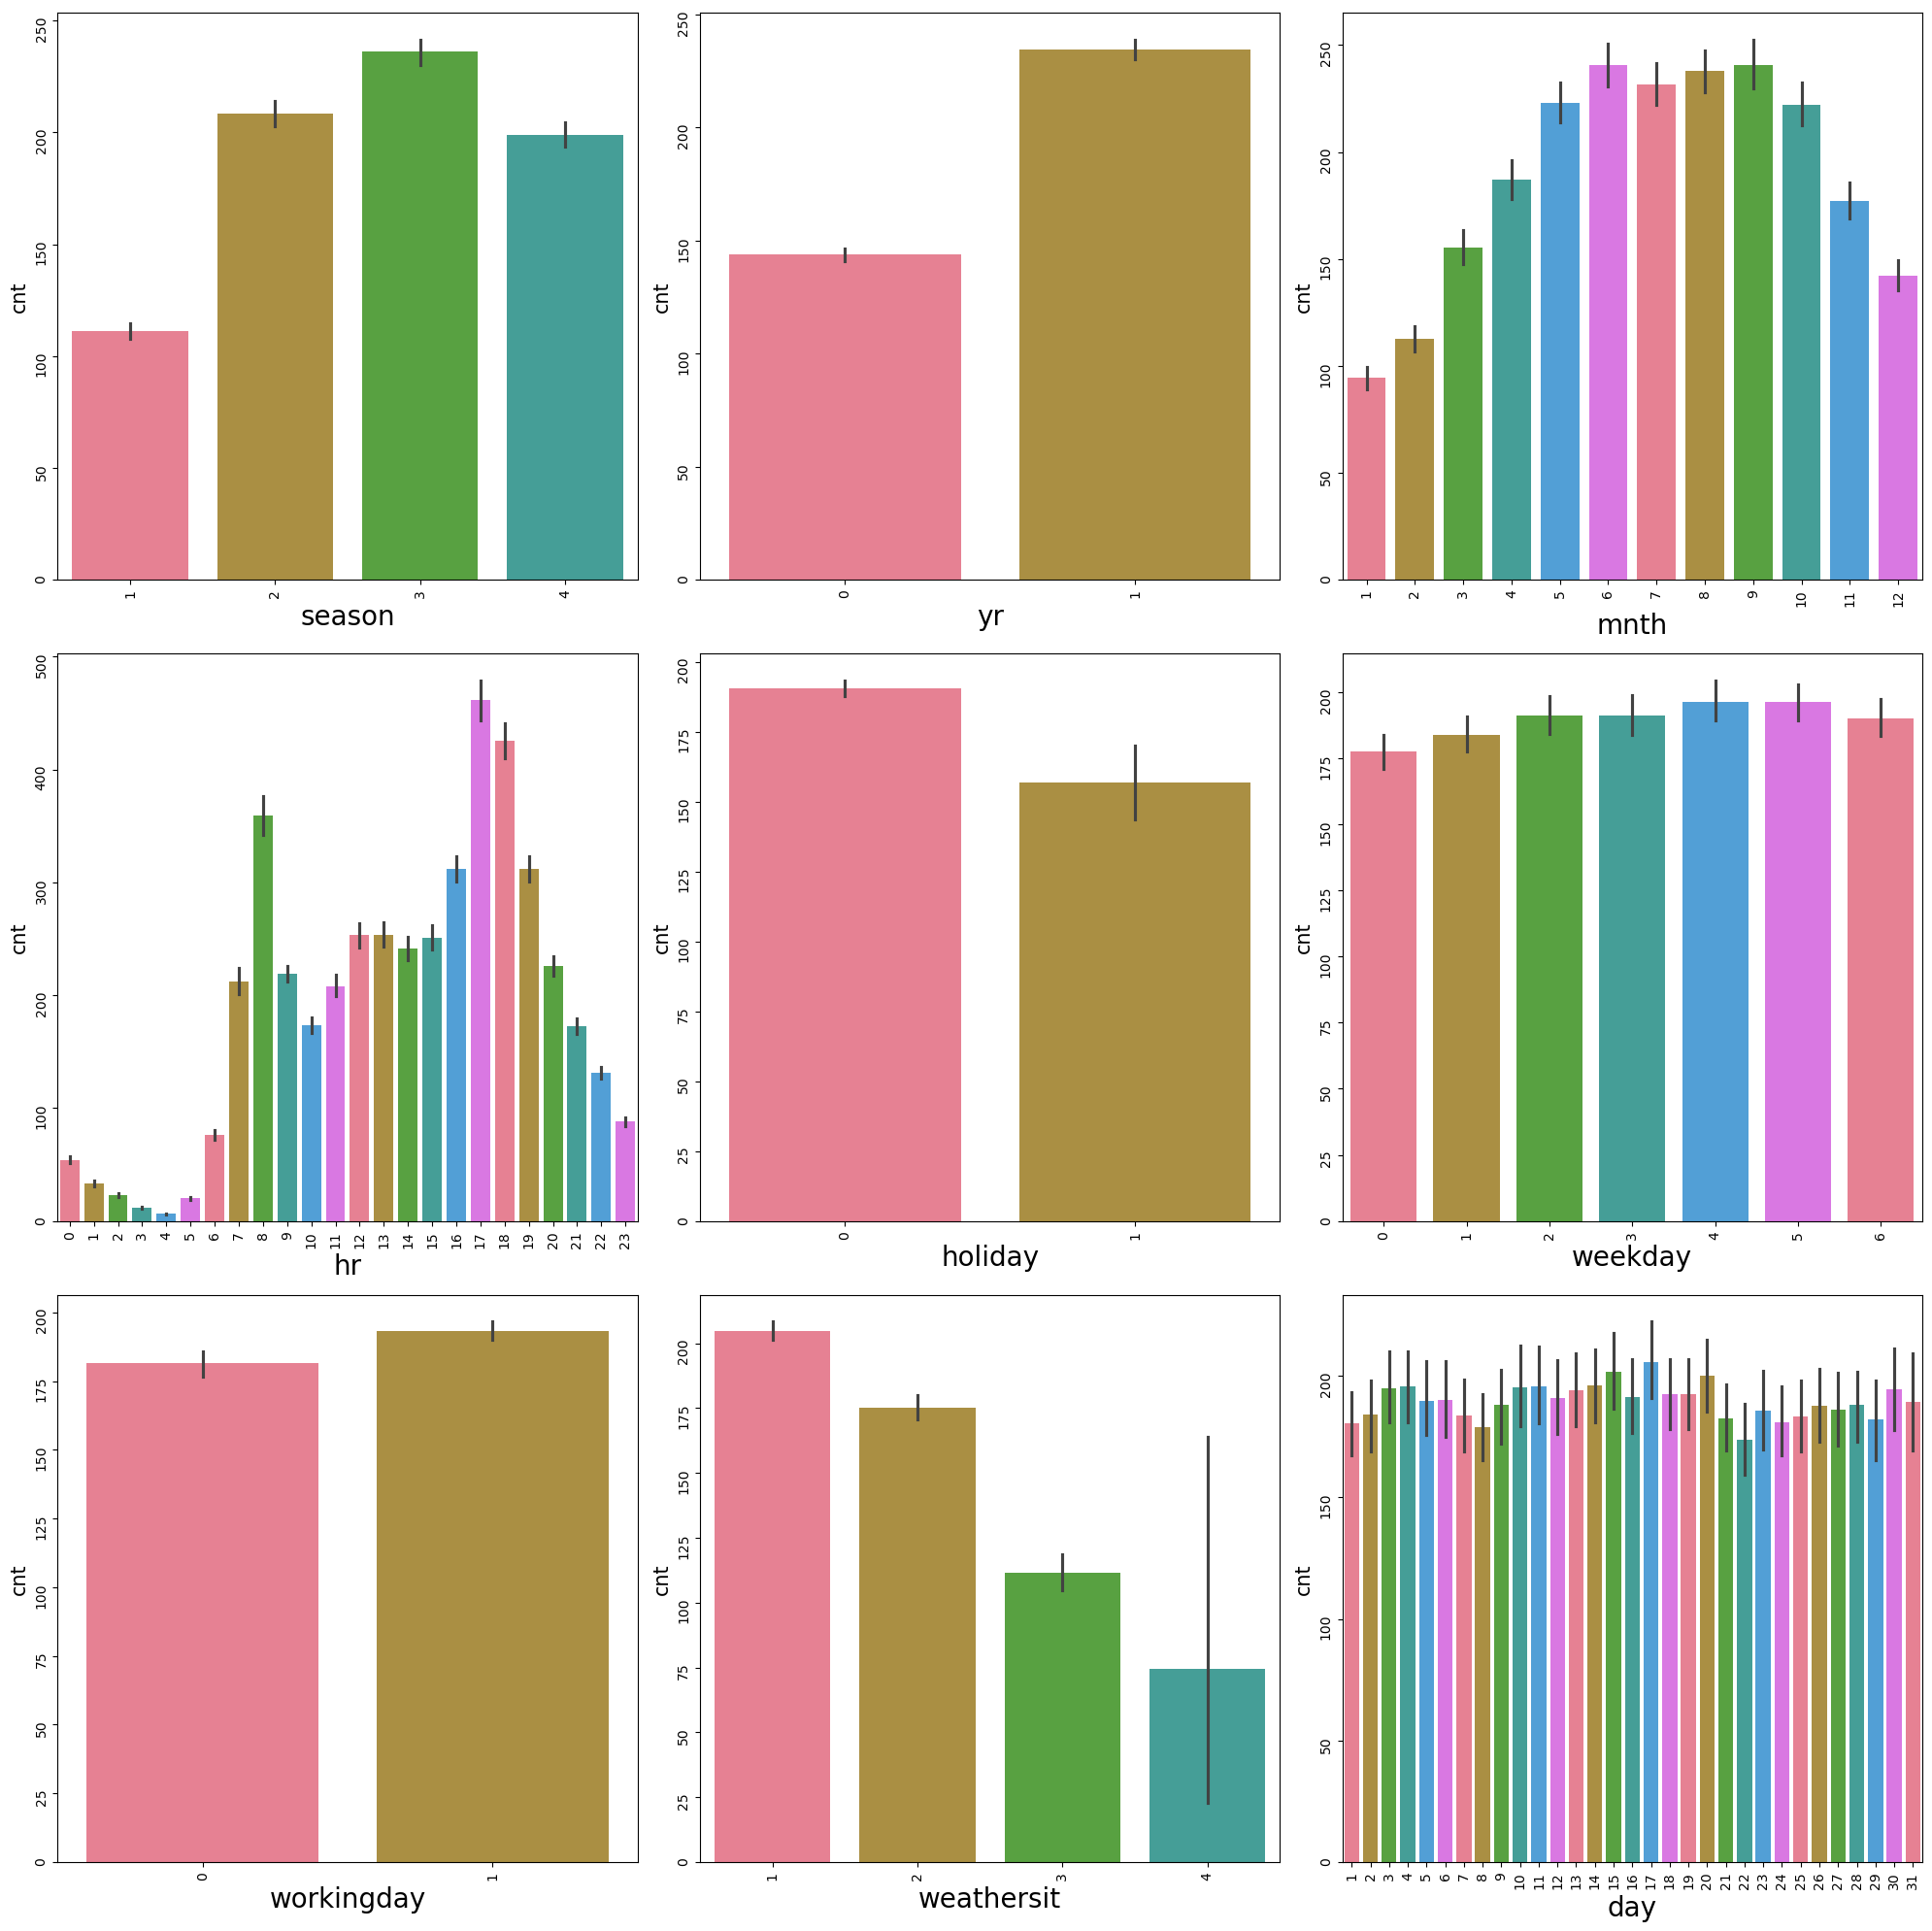

In [17]:
palette = sns.color_palette('husl')
plt.figure(figsize=(20,20),facecolor='white')  # define the plot size
plt_num=1
for i in data[['season','yr','mnth','hr','holiday','weekday','workingday','weathersit','day']]: # for loop
    if plt_num <= 9 :  # if condition
        plt.subplot(3,3,plt_num)  # assign the row and column
        sns.barplot(x=data[i],y=data.cnt,palette=palette)  # create a barplot
        plt.xticks(rotation=90)  
        plt.yticks(rotation=90)
        plt.xlabel(i,fontsize=20)  # assign the xlabel value
        plt.ylabel('cnt',fontsize=15)  # assign the ylabel value
        plt_num += 1  # increment
plt.tight_layout()  # use for data show function

**Insights**
* Here we can see the highest bikes are rented in season 3 and year 2012 and in 5 to 10 month at evening 5pm and 6pm.
* Here we can see the highest bikes are rented on not holidays.
* Highest bikes have given on rent in working days.
* Highest bikes have given in 1st weather situation.

<Axes: xlabel='temp', ylabel='atemp'>

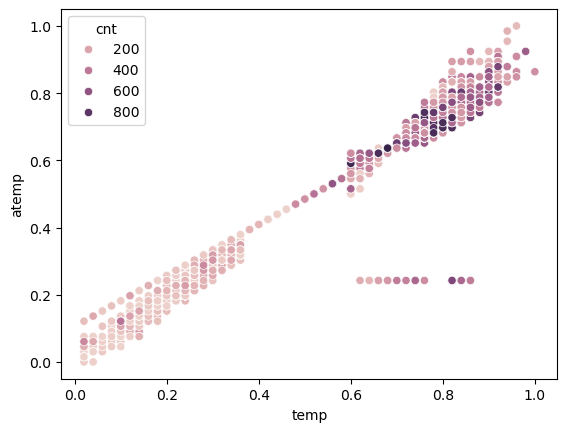

In [18]:
sns.scatterplot(x=data.temp, y=data.atemp,data=data,hue='cnt')  # create scatter plot between temp and atemp

* Here we use scatter plot for check relation between continuous columns.
* Here we can see the positive relation between temp and atemp.

<Axes: xlabel='temp', ylabel='windspeed'>

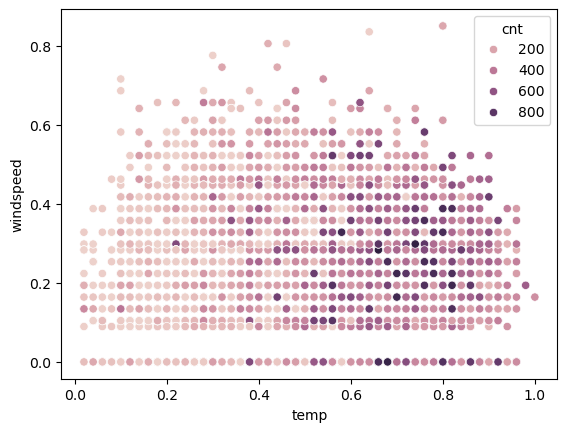

In [19]:
sns.scatterplot(x=data.temp,y=data.windspeed,hue=data.cnt) # create scatter plot between temp and windspeed

* There is no relationship between temp and windspeed.

<Axes: xlabel='hum', ylabel='windspeed'>

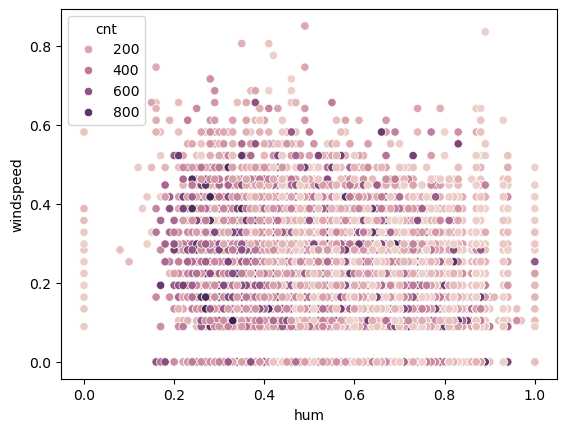

In [20]:
sns.scatterplot(x=data.hum, y=data.windspeed,hue=data.cnt) # create scatter plot between hum and windspeed

* There is no relation between hum and windspeed

### 3. Multivariante Analysis

In [21]:
data.columns  # shows the every column

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'day'],
      dtype='object')

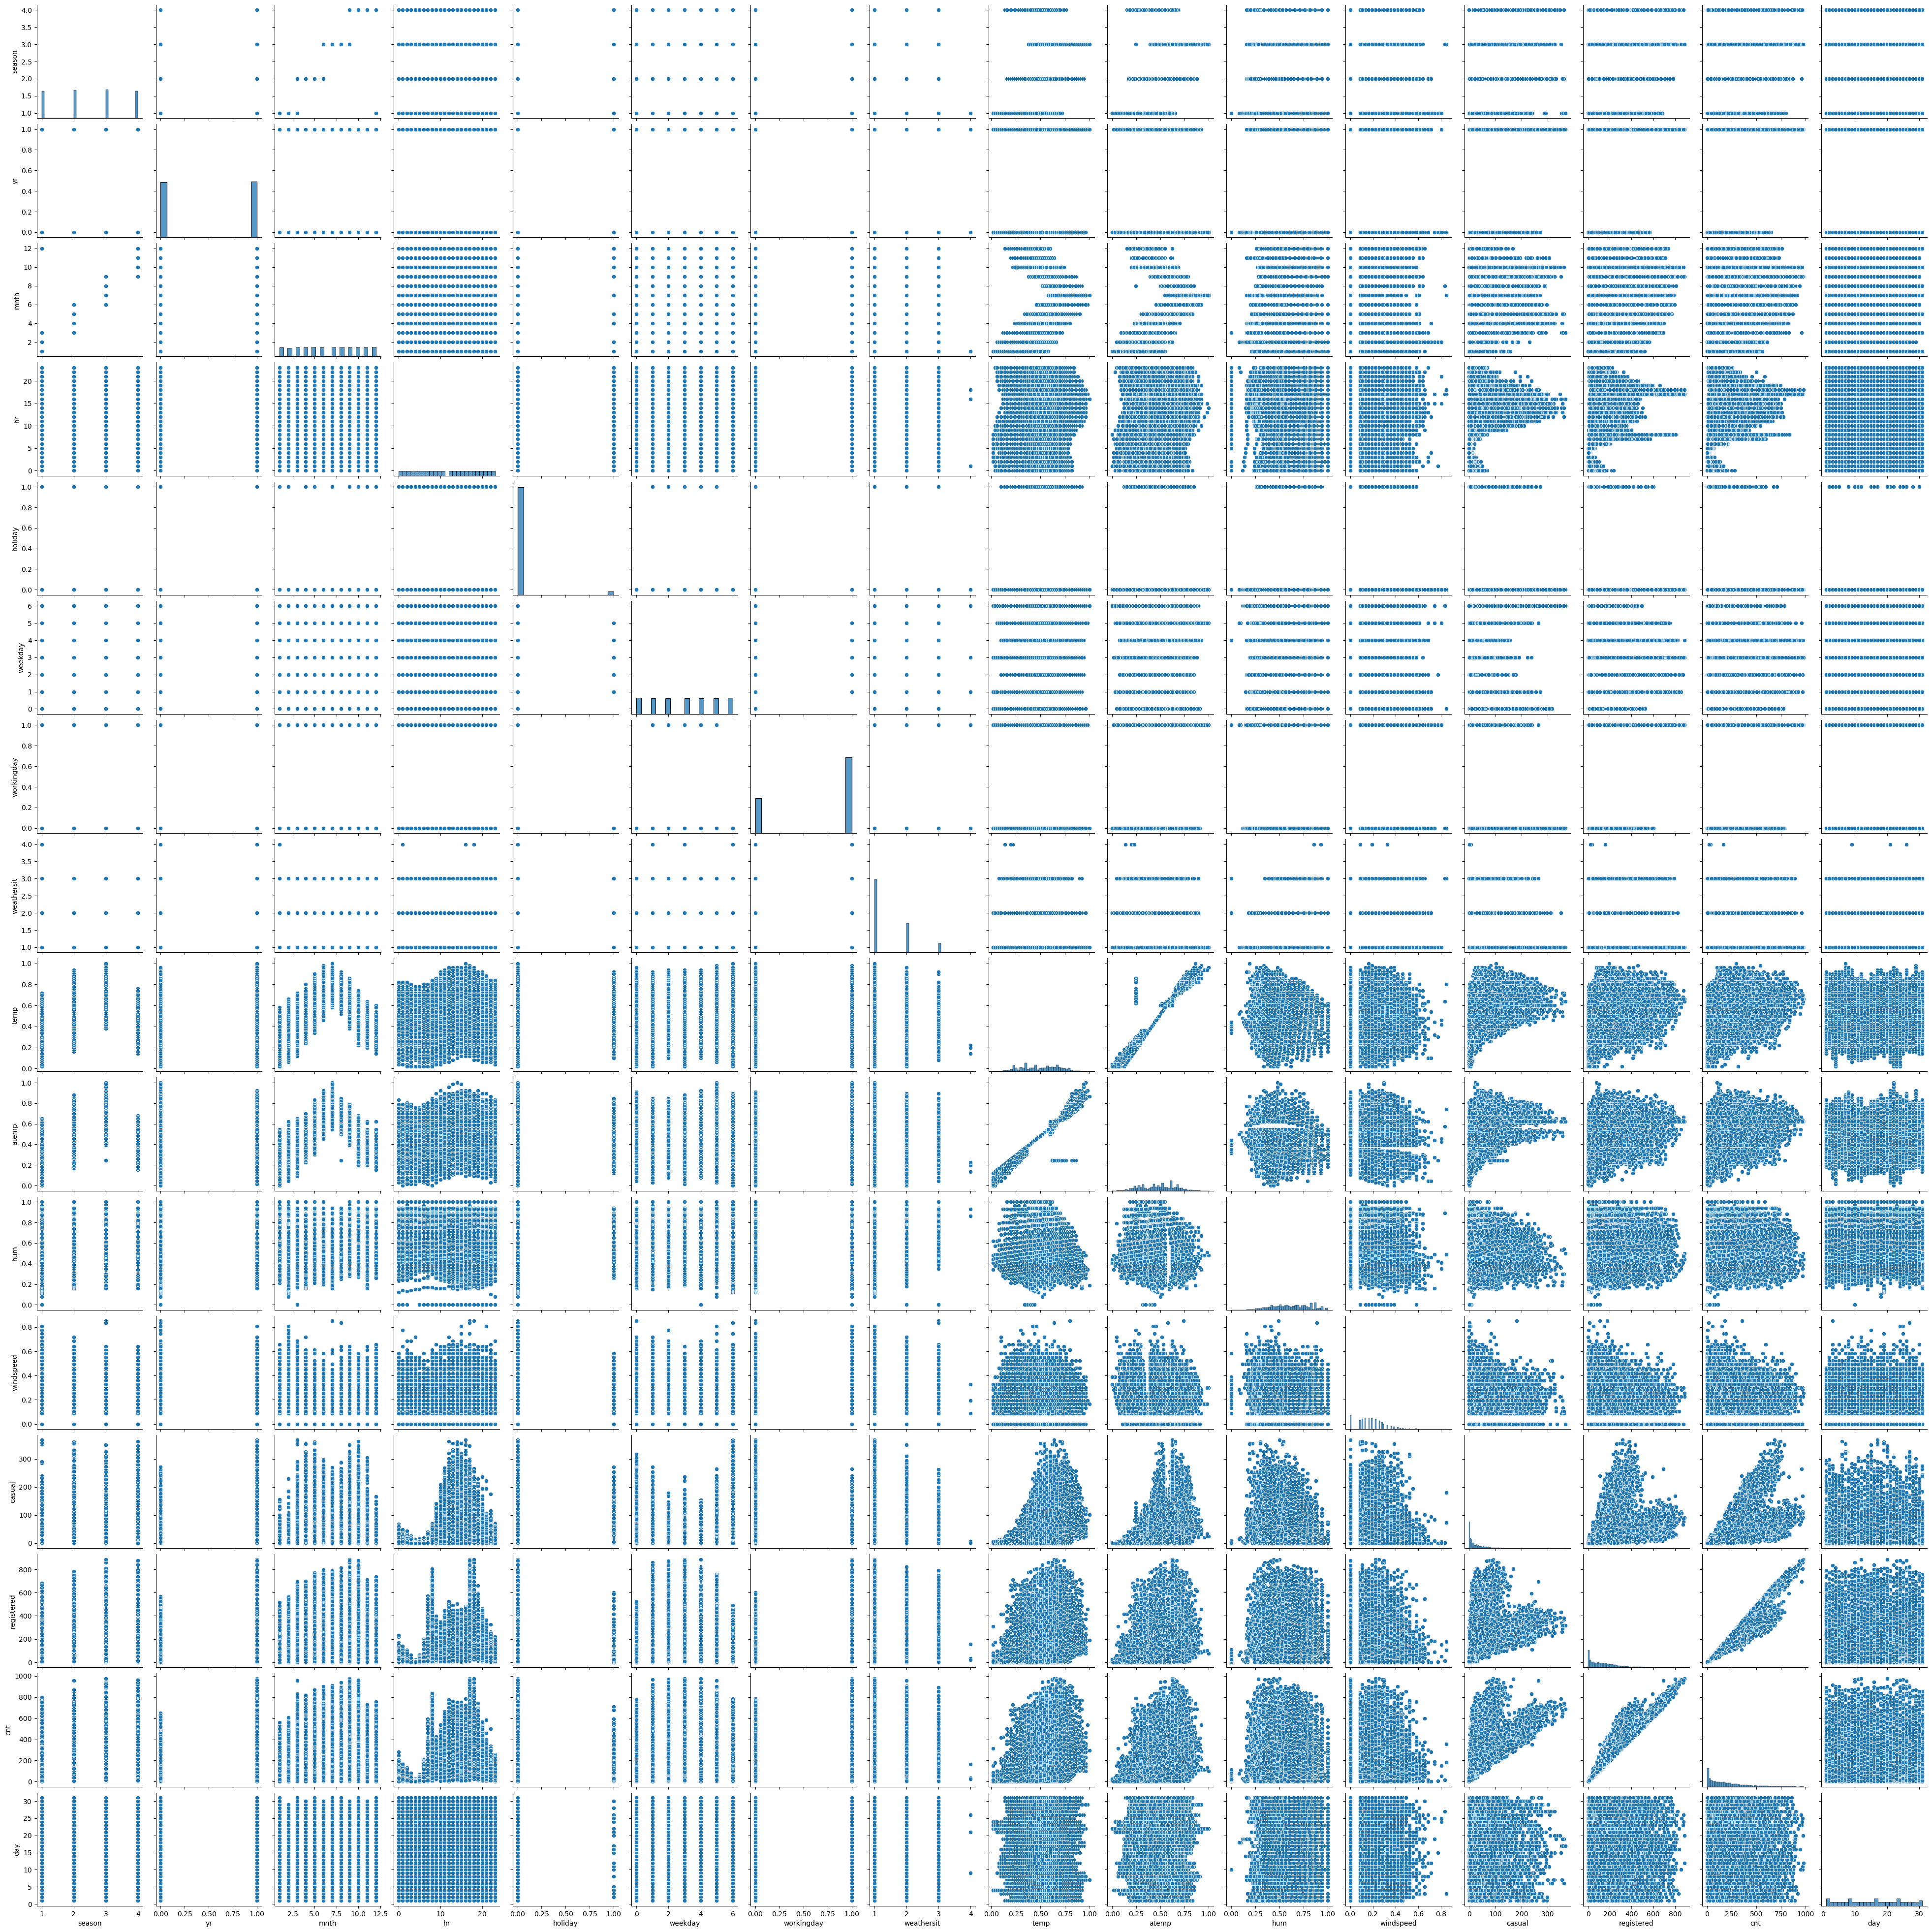

In [492]:
sns.pairplot(data)  # create pair plot for all columns

* Here we can see the positive relation between temp and atemp.
* Here we can see the positive relation between registered and cnt.

### **Final Report Of EDA**

* Here we use histogram plot for Continuous columns and we can not see the normal distribution in any columns.
* The bike rentals peak in season 3 and during 2012, with higher usage between the 5th and 10th months at evening 5pm and 6pm and primarily on working days and not holiday.
* Here we can see the positive relationship between temparature and adjusted temparature, as well as between total counts and registered users.
* These insights suggest a need to optimize bike availability and marketing efforts during these key periods.

## Feature Engineering

**Feature Engineering** :- It is the process of using domain knowledge to select, modify or create new features from raw data that can improve the performance of machine learning model. It involves transforming raw data into a format that is more suitable for modeling and can significantly impact model accuracyand effectiveness.

#### 1. Data Preprocessing :-

**Data preprocessing** :- It is a crucial step in machine learning that involves transforming raw data into a clean and usable format. This process ensures that the data is suitable for analysis and modeling, ultimately improving the performance and accuracy of machine learning models

In [127]:
data.isnull().sum()  # check the null value

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
day           0
dtype: int64

* Here we can not see the null values.

#### Handling Outliers

Outliers are data points that differ significantly from the majority of the data, often due to variability, errors, or unusual conditions. They can distort statistical analyses and model predictions if not properly hnadled.

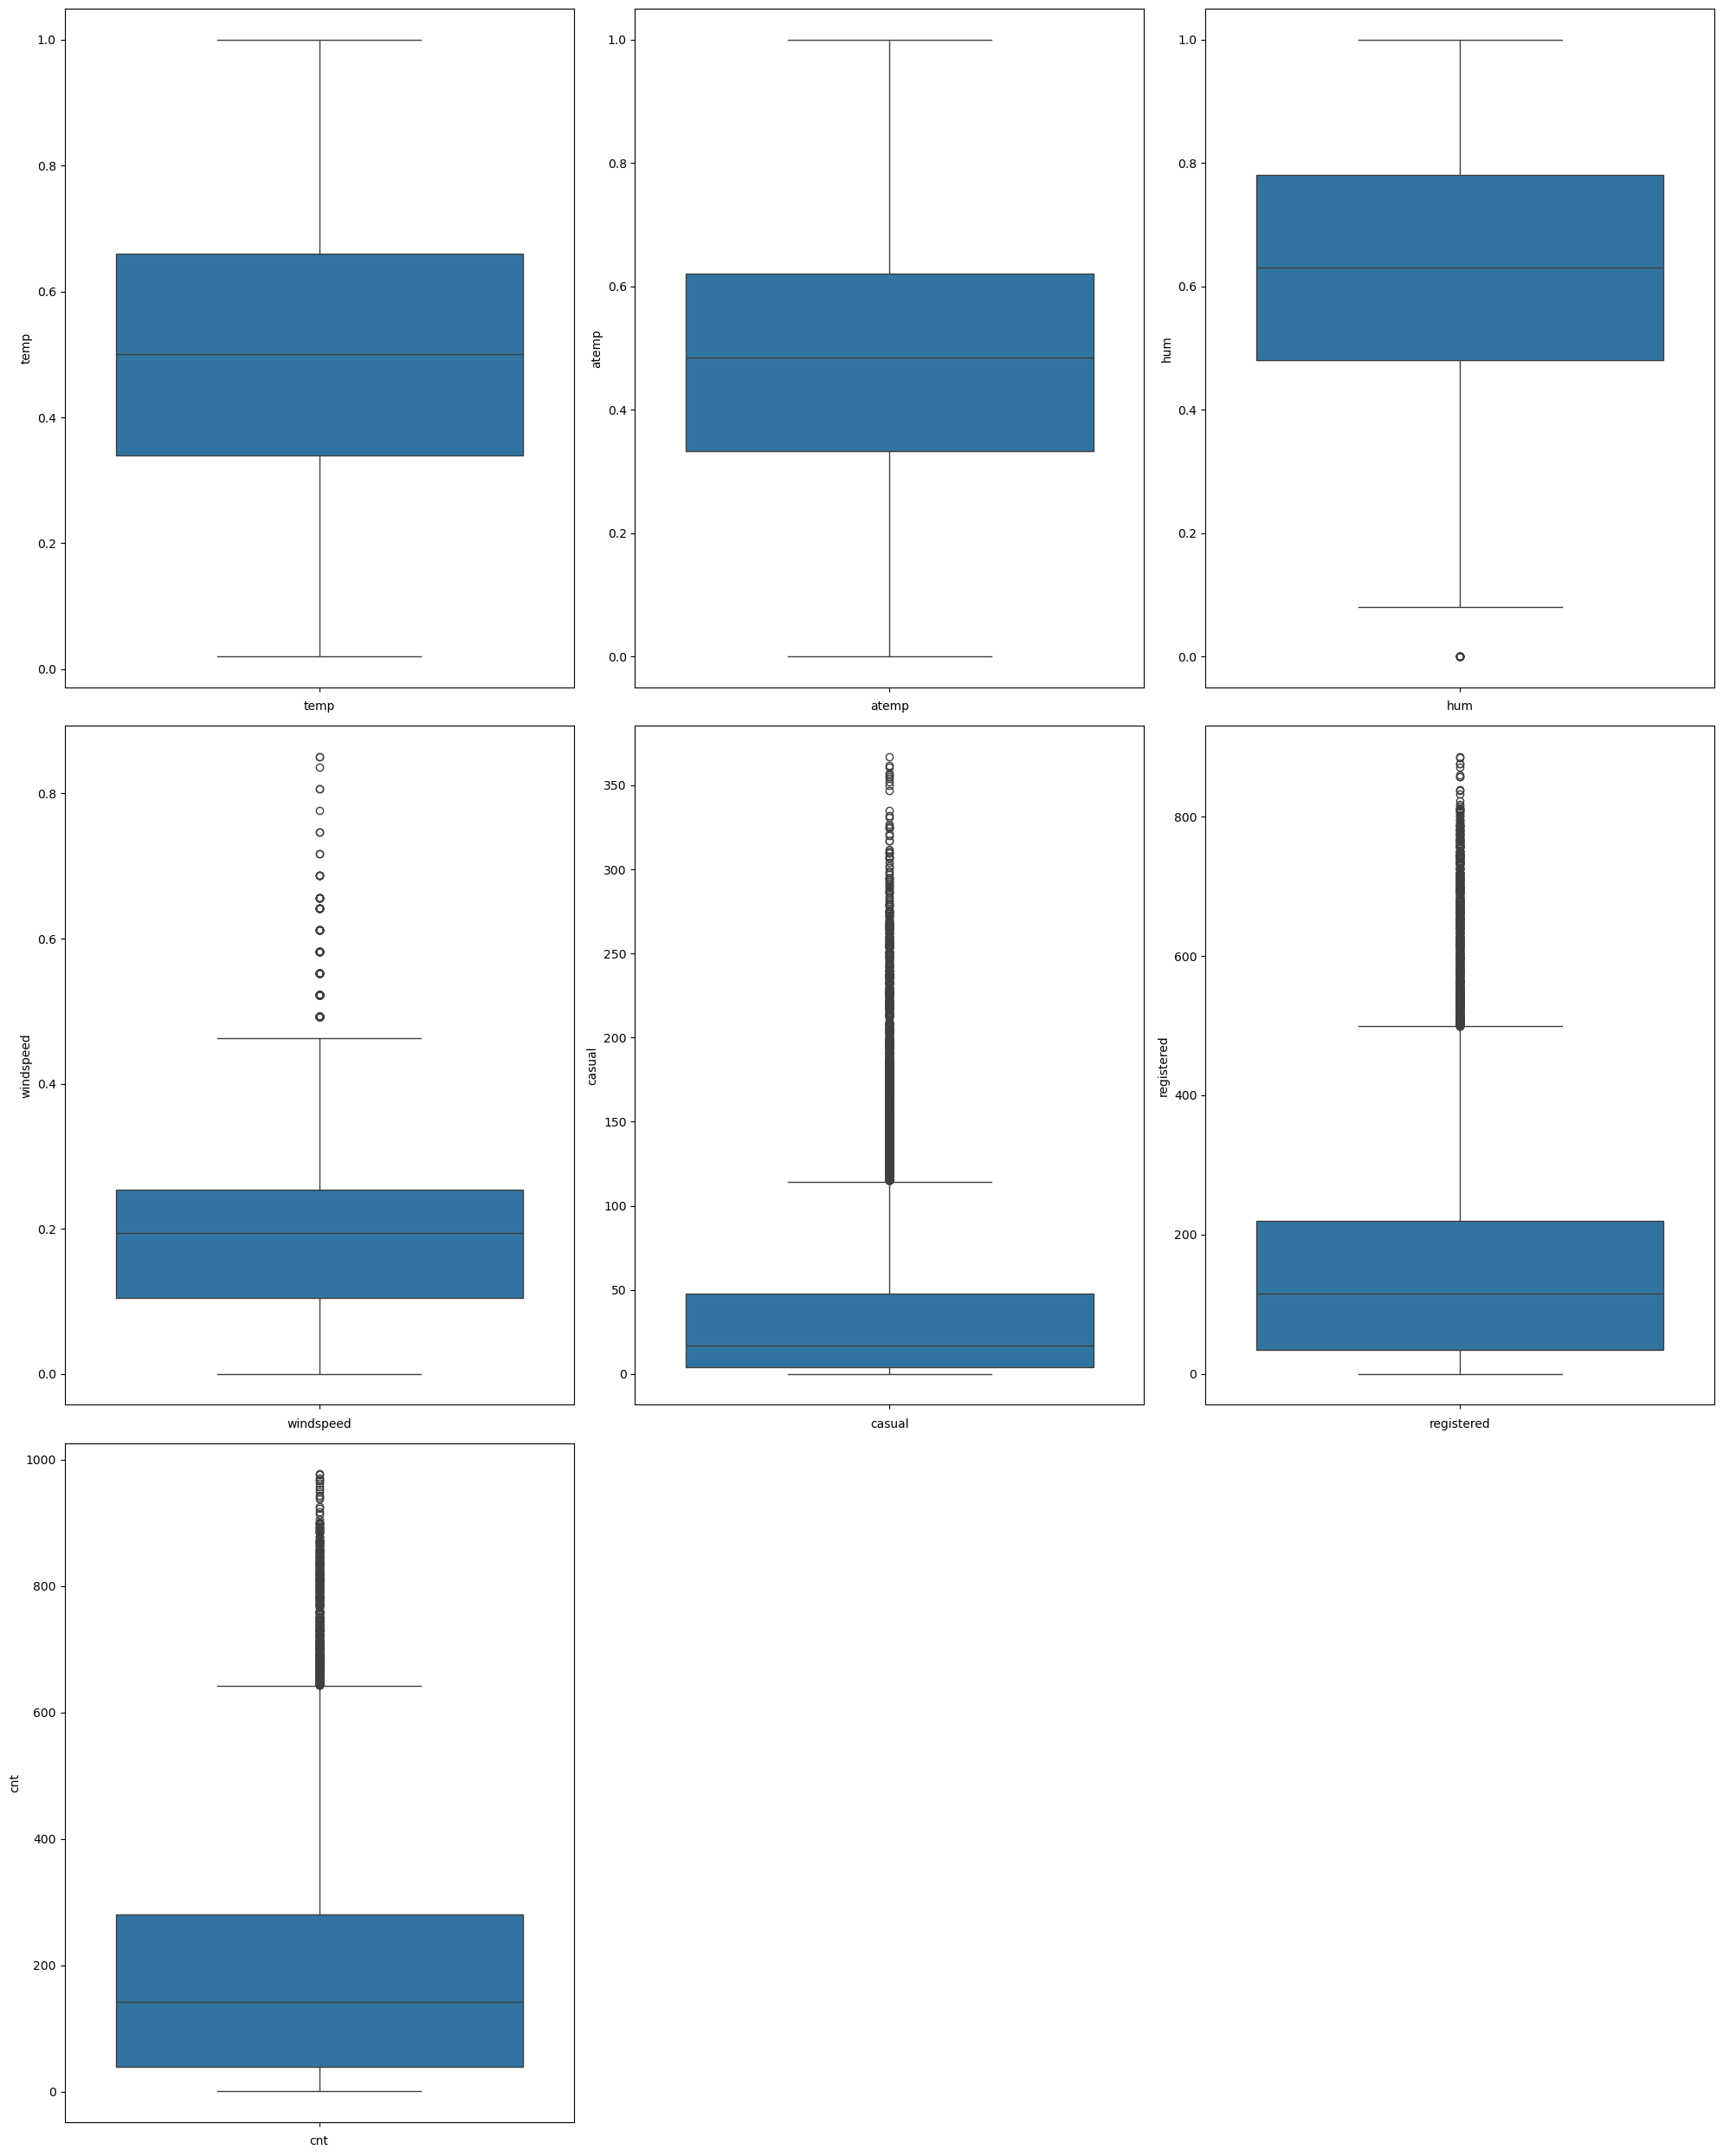

In [184]:
# check the outliers in the dataset
plt.figure(figsize=(20,25),facecolor='white')  # define the plot size
plt_num = 1
for i in con_col:  # define for loop
    if plt_num <=8 :  # apply if condition 
        plt.subplot(3,3,plt_num) # assign raw and column
        sns.boxplot(con_col[i])  # create boxplot
        plt.xlabel(i)  # assign the xlabel value
        plt.ylabel(i)  # assign the ylabel value
        plt_num = plt_num  + 1  # increment
plt.tight_layout() # use for show data

* Here we can see the outliers in four columns like hum, casual, registered and windspeed.

In [128]:
data.loc[data.hum < 0.05,'hum'] = data.hum.median()  # handle the outliers

<Axes: xlabel='hum'>

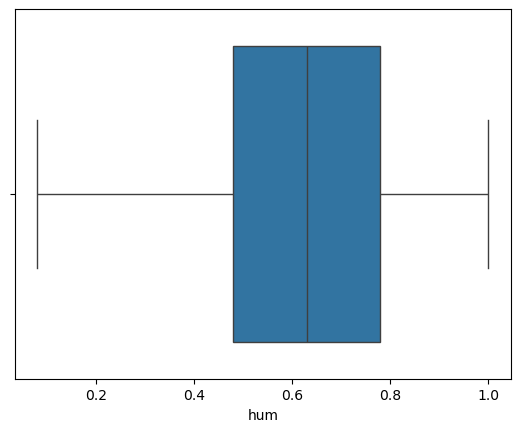

In [129]:
sns.boxplot(x =data.hum)  # create boxplot

In [130]:
data.loc[data.windspeed > 0.5, 'windspeed'] = data.windspeed.median() # handle the outliers

<Axes: ylabel='windspeed'>

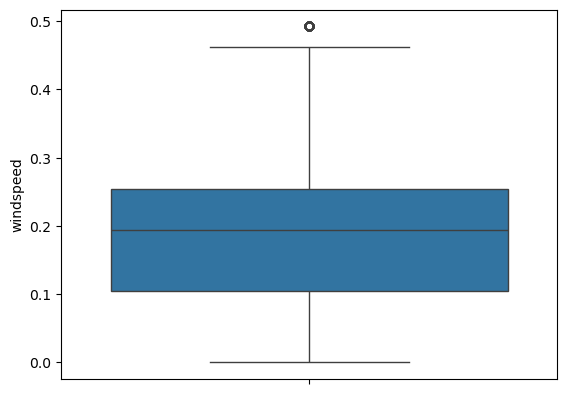

In [131]:
sns.boxplot(data.windspeed)  # create boxplot

In [132]:
data.loc[data.casual > 300,'casual'] = data.casual.median() # handle the outliers

<Axes: xlabel='casual'>

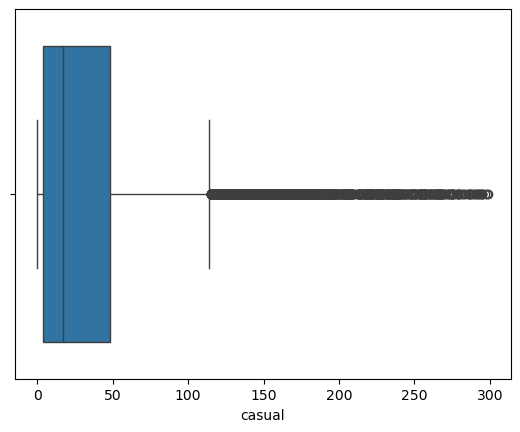

In [133]:
sns.boxplot(x = data.casual) # create boxplot

In [134]:
data.loc[data.registered > 820, "registered"] = data.registered.median() # handle the outliers

<Axes: ylabel='registered'>

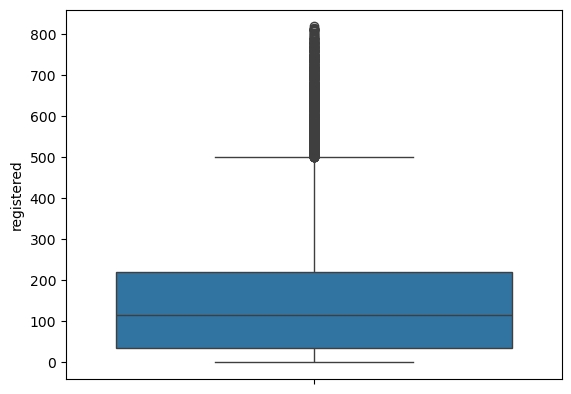

In [135]:
sns.boxplot(data.registered) # create boxplot

In [136]:
data.loc[data.cnt > 900, 'cnt'] = data.cnt.median()  # handle the outliers

<Axes: ylabel='cnt'>

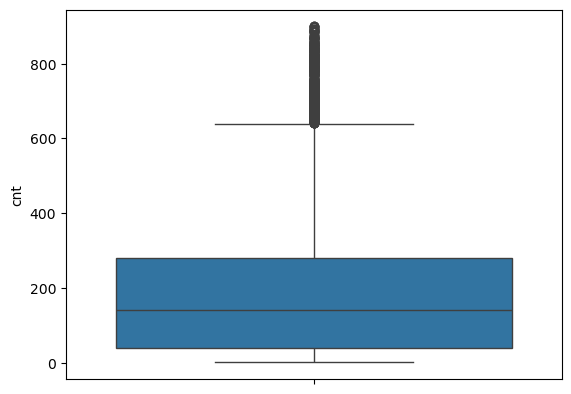

In [137]:
sns.boxplot(data.cnt) # create boxplot

In [138]:
data.head()  # shows first 5 rows

season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0       1   0     1   0        0        6           0           1  0.24   
1       1   0     1   1        0        6           0           1  0.22   
2       1   0     1   2        0        6           0           1  0.22   
3       1   0     1   3        0        6           0           1  0.24   
4       1   0     1   4        0        6           0           1  0.24   

    atemp   hum  windspeed  casual  registered  cnt  day  
0  0.2879  0.81        0.0       3          13   16    1  
1  0.2727  0.80        0.0       8          32   40    1  
2  0.2727  0.80        0.0       5          27   32    1  
3  0.2879  0.75        0.0       3          10   13    1  
4  0.2879  0.75        0.0       0           1    1    1

### 2. Feature Selection :

**Feature Selection:-** It is the process of identifying and selecting a subset of relevant features (variables, predictors) from a larger set of available features in a dataset. The goal of feature selection is to improve the performance of machine learning models by retaining only the most important and informative features, while eliminating redundant or irrelevant ones.

<Axes: >

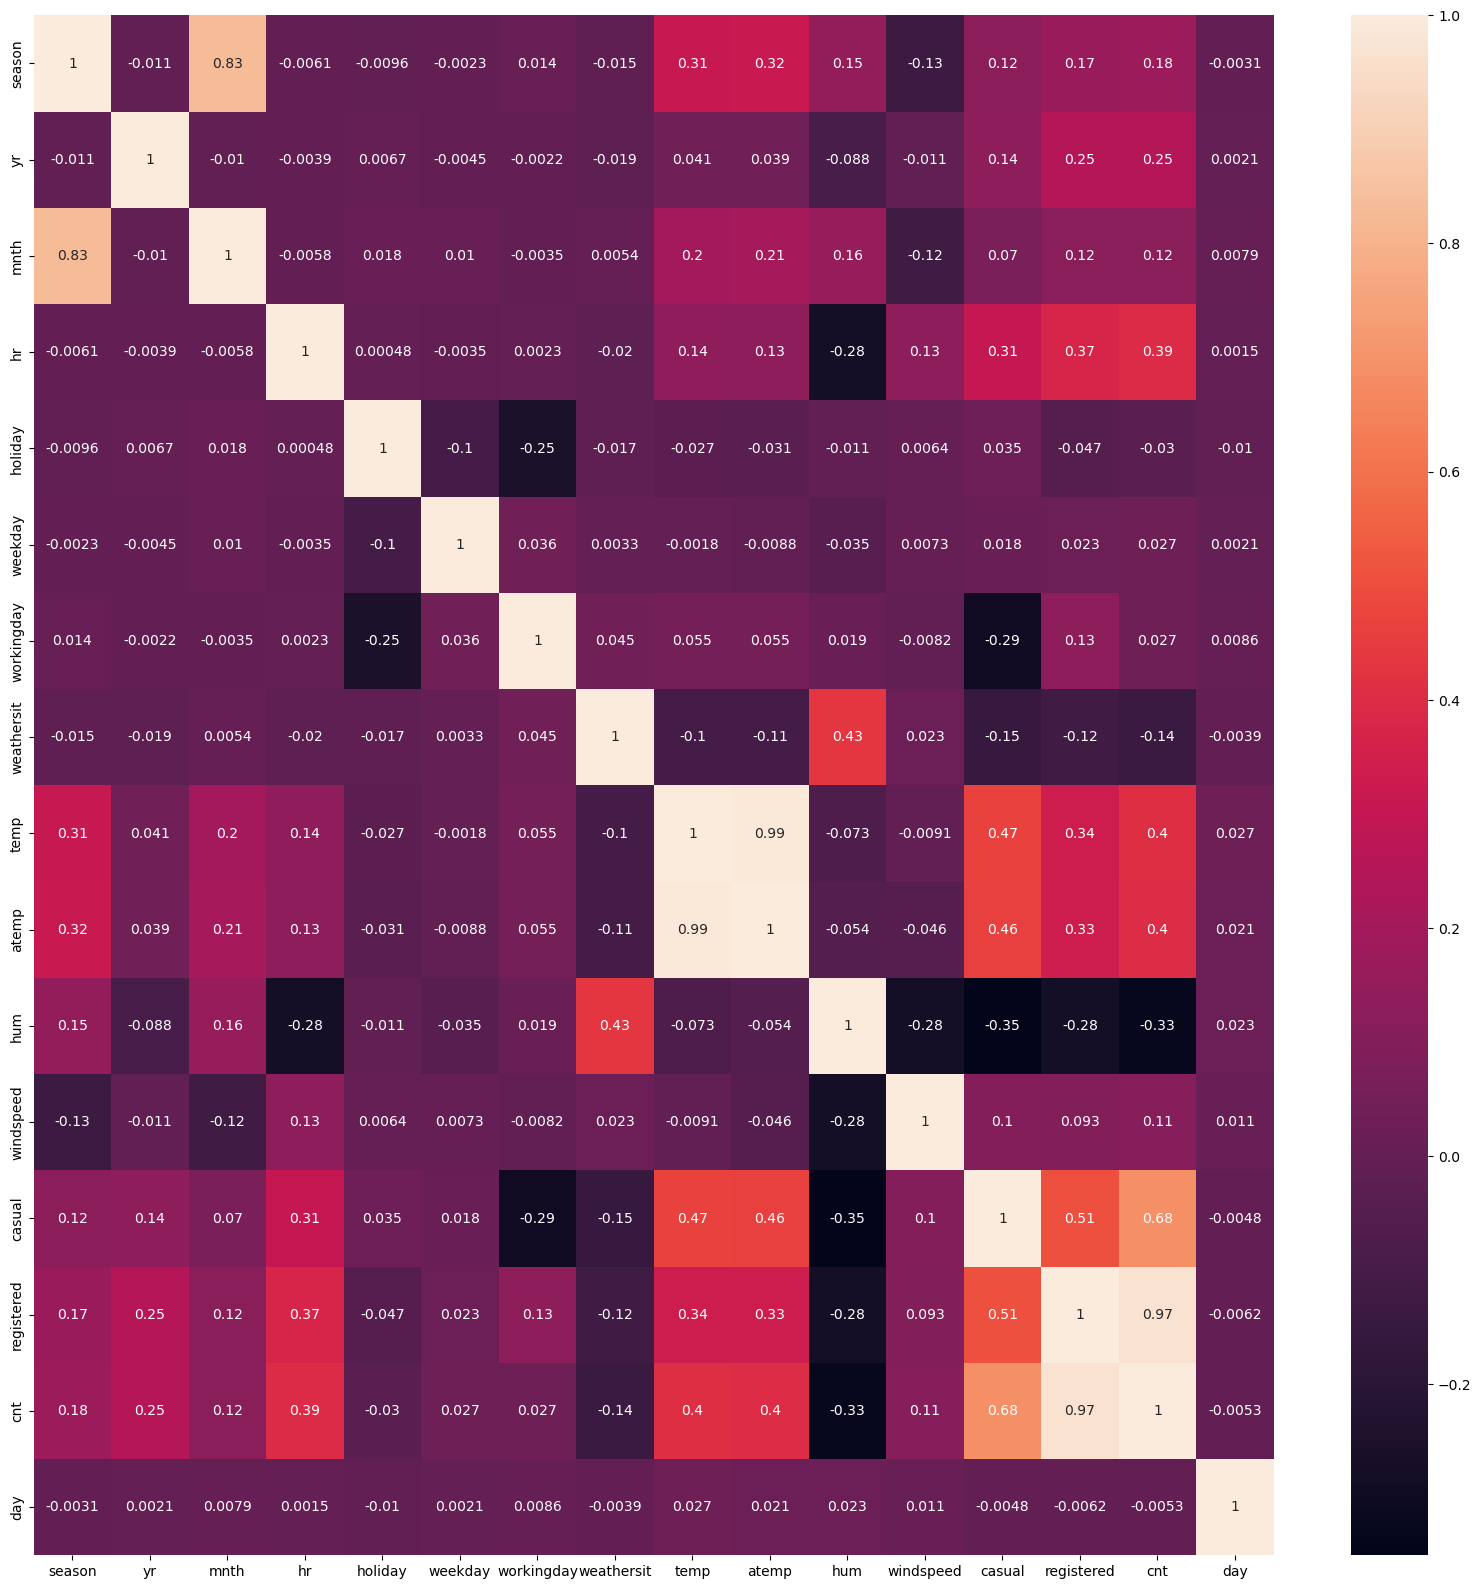

In [196]:
plt.figure(figsize=(20,20))  # define the plot size
sns.heatmap(data.corr(),annot=True) # heatmap for check the relationship

**Insights:**
* Here we can see the high correlation between temp and atemp.
* Here we can see the high correlation between registered and cnt.

In [139]:
data.drop(['atemp'],axis=1,inplace=True)  # drop the atemp column

In [198]:
data.head()  # shows the first 5 rows

season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp   hum  \
0       1   0     1   0        0        6           0           1  0.24  0.81   
1       1   0     1   1        0        6           0           1  0.22  0.80   
2       1   0     1   2        0        6           0           1  0.22  0.80   
3       1   0     1   3        0        6           0           1  0.24  0.75   
4       1   0     1   4        0        6           0           1  0.24  0.75   

   windspeed  casual  registered  cnt  day  
0        0.0       3          13   16    1  
1        0.0       8          32   40    1  
2        0.0       5          27   32    1  
3        0.0       3          10   13    1  
4        0.0       0           1    1    1

In [199]:
data.corr()  # check correlation

season        yr      mnth        hr   holiday   weekday  \
season      1.000000 -0.010742  0.830386 -0.006117 -0.009585 -0.002335   
yr         -0.010742  1.000000 -0.010473 -0.003867  0.006692 -0.004485   
mnth        0.830386 -0.010473  1.000000 -0.005772  0.018430  0.010400   
hr         -0.006117 -0.003867 -0.005772  1.000000  0.000479 -0.003498   
holiday    -0.009585  0.006692  0.018430  0.000479  1.000000 -0.102088   
weekday    -0.002335 -0.004485  0.010400 -0.003498 -0.102088  1.000000   
workingday  0.013743 -0.002196 -0.003477  0.002285 -0.252471  0.035955   
weathersit -0.014524 -0.019157  0.005400 -0.020203 -0.017036  0.003311   
temp        0.312025  0.040913  0.201691  0.137603 -0.027340 -0.001795   
hum         0.145998 -0.088295  0.161242 -0.277959 -0.011376 -0.035342   
windspeed  -0.131152 -0.010830 -0.122295  0.132640  0.006445  0.007336   
casual      0.121838  0.135249  0.069571  0.306939  0.034913  0.017957   
registered  0.169678  0.250551  0.118552  0.374980 -0.046855  0.022749   
cnt         0.175529  0.248169  0.118581  0.393884 -0.030413  0.027420   
day        -0.003052  0.002057  0.007929  0.001538 -0.010132  0.002145   

            workingday  weathersit      temp       hum  windspeed    casual  \
season        0.013743   -0.014524  0.312025  0.145998  -0.131152  0.121838   
yr           -0.002196   -0.019157  0.040913 -0.088295  -0.010830  0.135249   
mnth         -0.003477    0.005400  0.201691  0.161242  -0.122295  0.069571   
hr            0.002285   -0.020203  0.137603 -0.277959   0.132640  0.306939   
holiday      -0.252471   -0.017036 -0.027340 -0.011376   0.006445  0.034913   
weekday       0.035955    0.003311 -0.001795 -0.035342   0.007336  0.017957   
workingday    1.000000    0.044672  0.055390  0.018631  -0.008191 -0.293130   
weathersit    0.044672    1.000000 -0.102640  0.430619   0.023456 -0.152526   
temp          0.055390   -0.102640  1.000000 -0.072686  -0.009053  0.467699   
hum           0.018631    0.430619 -0.072686  1.000000  -0.276419 -0.349846   
windspeed    -0.008191    0.023456 -0.009053 -0.276419   1.000000  0.101873   
casual       -0.293130   -0.152526  0.467699 -0.349846   0.101873  1.000000   
registered    0.131594   -0.119001  0.335276 -0.278628   0.093273  0.508502   
cnt           0.027410   -0.141434  0.404246 -0.327239   0.106032  0.683995   
day           0.008627   -0.003882  0.027180  0.023145   0.011404 -0.004827   

            registered       cnt       day  
season        0.169678  0.175529 -0.003052  
yr            0.250551  0.248169  0.002057  
mnth          0.118552  0.118581  0.007929  
hr            0.374980  0.393884  0.001538  
holiday      -0.046855 -0.030413 -0.010132  
weekday       0.022749  0.027420  0.002145  
workingday    0.131594  0.027410  0.008627  
weathersit   -0.119001 -0.141434 -0.003882  
temp          0.335276  0.404246  0.027180  
hum          -0.278628 -0.327239  0.023145  
windspeed     0.093273  0.106032  0.011404  
casual        0.508502  0.683995 -0.004827  
registered    1.000000  0.965301 -0.006218  
cnt           0.965301  1.000000 -0.005345  
day          -0.006218 -0.005345  1.000000

In [200]:
data.cov()   # check covariance

season         yr       mnth          hr   holiday   weekday  \
season       1.225268  -0.005946   3.160817   -0.046817 -0.001774 -0.005185   
yr          -0.005946   0.250008  -0.018007   -0.013369  0.000559 -0.004498   
mnth         3.160817  -0.018007  11.825178   -0.137239  0.010595  0.071733   
hr          -0.046817  -0.013369  -0.137239   47.808998  0.000554 -0.048509   
holiday     -0.001774   0.000559   0.010595    0.000554  0.027944 -0.034230   
weekday     -0.005185  -0.004498   0.071733   -0.048509 -0.034230  4.023119   
workingday   0.007080  -0.000511  -0.005565    0.007354 -0.019643  0.033566   
weathersit  -0.010279  -0.006124   0.011871   -0.089311 -0.001821  0.004246   
temp         0.066506   0.003939   0.133551    0.183207 -0.000880 -0.000693   
hum          0.030969  -0.008460   0.106256   -0.368304 -0.000364 -0.013585   
windspeed   -0.016496  -0.000615  -0.047785    0.104210  0.000122  0.001672   
casual       6.416105   3.217228  11.381603  100.966850  0.277656  1.713526   
registered  28.013121  18.685001  60.803974  386.707954 -1.168203  6.805429   
cnt         34.926658  22.305693  73.301128  489.570392 -0.913882  9.886321   
day         -0.029691   0.009039   0.239662    0.093465 -0.014887  0.037821   

            workingday  weathersit       temp        hum  windspeed  \
season        0.007080   -0.010279   0.066506   0.030969  -0.016496   
yr           -0.000511   -0.006124   0.003939  -0.008460  -0.000615   
mnth         -0.005565    0.011871   0.133551   0.106256  -0.047785   
hr            0.007354   -0.089311   0.183207  -0.368304   0.104210   
holiday      -0.019643   -0.001821  -0.000880  -0.000364   0.000122   
weekday       0.033566    0.004246  -0.000693  -0.013585   0.001672   
workingday    0.216626    0.013293   0.004964   0.001662  -0.000433   
weathersit    0.013293    0.408777  -0.012636   0.052760   0.001704   
temp          0.004964   -0.012636   0.037078  -0.002682  -0.000198   
hum           0.001662    0.052760  -0.002682   0.036723  -0.006019   
windspeed    -0.000433    0.001704  -0.000198  -0.006019   0.012911   
casual       -6.490634   -4.639371   4.284458  -3.189477   0.550694   
registered    9.135053  -11.347873   9.628972  -7.963692   1.580711   
cnt           2.293288  -16.255075  13.992487 -11.272691   2.165755   
day           0.035293   -0.021814   0.046001   0.038984   0.011389   

                 casual    registered           cnt        day  
season         6.416105     28.013121     34.926658  -0.029691  
yr             3.217228     18.685001     22.305693   0.009039  
mnth          11.381603     60.803974     73.301128   0.239662  
hr           100.966850    386.707954    489.570392   0.093465  
holiday        0.277656     -1.168203     -0.913882  -0.014887  
weekday        1.713526      6.805429      9.886321   0.037821  
workingday    -6.490634      9.135053      2.293288   0.035293  
weathersit    -4.639371    -11.347873    -16.255075  -0.021814  
temp           4.284458      9.628972     13.992487   0.046001  
hum           -3.189477     -7.963692    -11.272691   0.038984  
windspeed      0.550694      1.580711      2.165755   0.011389  
casual      2263.311897   3608.149597   5849.477239  -2.018475  
registered  3608.149597  22245.376044  25880.625157  -8.151922  
cnt         5849.477239  25880.625157  32313.493834  -8.445266  
day           -2.018475     -8.151922     -8.445266  77.253086

## Model Creation

In [201]:
data.columns   # show all the features

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'day'],
      dtype='object')

In [140]:
x = data.drop('cnt',axis=1)
y = data['cnt']

In [141]:
x  # shows the independent variables

season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0           1   0     1   0        0        6           0           1  0.24   
1           1   0     1   1        0        6           0           1  0.22   
2           1   0     1   2        0        6           0           1  0.22   
3           1   0     1   3        0        6           0           1  0.24   
4           1   0     1   4        0        6           0           1  0.24   
...       ...  ..   ...  ..      ...      ...         ...         ...   ...   
17374       1   1    12  19        0        1           1           2  0.26   
17375       1   1    12  20        0        1           1           2  0.26   
17376       1   1    12  21        0        1           1           1  0.26   
17377       1   1    12  22        0        1           1           1  0.26   
17378       1   1    12  23        0        1           1           1  0.26   

        hum  windspeed  casual  registered  day  
0      0.81     0.0000       3          13    1  
1      0.80     0.0000       8          32    1  
2      0.80     0.0000       5          27    1  
3      0.75     0.0000       3          10    1  
4      0.75     0.0000       0           1    1  
...     ...        ...     ...         ...  ...  
17374  0.60     0.1642      11         108   31  
17375  0.60     0.1642       8          81   31  
17376  0.60     0.1642       7          83   31  
17377  0.56     0.1343      13          48   31  
17378  0.65     0.1343      12          37   31  

[17379 rows x 14 columns]

In [27]:
y   # shows the dependent variable

0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 17379, dtype: int64

#### Split the data into training and testing

In [142]:
from sklearn.model_selection import train_test_split  # import train test split model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=33) # split the data into training and testing

In [143]:
x_train  # check the independent training data

season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
12652       2   1     6   9        0        6           0           1  0.60   
1841        2   0     3  11        0        2           1           1  0.44   
691         1   0     2   3        0        2           1           2  0.16   
3850        2   0     6   8        0        2           1           1  0.58   
13081       3   1     7   6        1        3           0           1  0.66   
...       ...  ..   ...  ..      ...      ...         ...         ...   ...   
10435       1   1     3  22        0        4           1           1  0.52   
57          1   0     1  12        0        1           1           1  0.22   
578         1   0     1   9        0        3           1           3  0.22   
5848        3   0     9   4        0        2           1           2  0.54   
2439        2   0     4  13        0        6           0           3  0.46   

        hum  windspeed  casual  registered  day  
12652  0.60     0.0896      88         279   16  
1841   0.51     0.3284      22          64   22  
691    0.69     0.0000       0           2    1  
3850   0.49     0.3881      45         441   14  
13081  0.69     0.0000       9          23    4  
...     ...        ...     ...         ...  ...  
10435  0.68     0.1343      32         137   15  
57     0.35     0.2985      13          48    3  
578    0.87     0.2985       3          55   26  
5848   0.94     0.2985       1           3    6  
2439   0.94     0.1940       9          49   16  

[13903 rows x 14 columns]

In [207]:
y_train # check the dependent training data

12652    367
1841      86
691        2
3850     486
13081     32
        ... 
10435    169
57        61
578       58
5848       4
2439      58
Name: cnt, Length: 13903, dtype: int64

In [208]:
x_test  # check the independent testing data

season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
11215       2   1     4  12        0        2           1           1  0.60   
12940       3   1     6   9        0        4           1           1  0.70   
11502       2   1     4  11        0        0           0           1  0.46   
13018       3   1     7  15        0        0           0           1  0.90   
117         1   0     1   2        0        4           1           1  0.16   
...       ...  ..   ...  ..      ...      ...         ...         ...   ...   
14431       3   1     8  12        0        3           1           1  0.76   
3133        2   0     5  11        0        0           0           1  0.60   
199         1   0     1  14        0        0           0           1  0.22   
13082       3   1     7   7        1        3           0           1  0.68   
12176       2   1     5  13        0        0           0           1  0.76   

        hum  windspeed  casual  registered  day  
11215  0.33     0.3582      65         179   17  
12940  0.54     0.1642      33         318   28  
11502  0.51     0.0000     128         283   29  
13018  0.37     0.2836     101         244    1  
117    0.64     0.0000       0           2    6  
...     ...        ...     ...         ...  ...  
14431  0.40     0.0000      79         281   29  
3133   0.78     0.2239     120         202   15  
199    0.32     0.4627       8          64    9  
13082  0.65     0.0000      10          62    4  
12176  0.58     0.1940     270         228   27  

[3476 rows x 14 columns]

In [209]:
y_test  # check the dependent testing data

11215    244
12940    351
11502    411
13018    345
117        2
        ... 
14431    360
3133     322
199       72
13082     72
12176    498
Name: cnt, Length: 3476, dtype: int64

## Model Selection

### Linear Regression

In [144]:
from sklearn.linear_model import LinearRegression #import LinearRegression

In [145]:
lr = LinearRegression()  # create an instance object
lr.fit(x_train,y_train)  # train the model

LinearRegression()

In [146]:
lr_pred = lr.predict(x_test)  # predict the data

### Model Evaluation

In [147]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # import regression metrics

In [148]:
r2_1 = r2_score(y_test,lr_pred)  # check the model performance
r2_1

0.9958275151577836

In [149]:
mse1 = mean_squared_error(y_test,lr_pred) # check mean squared error
mse1

133.35755726594357

In [150]:
mae1 = mean_absolute_error(y_test, lr_pred)  # check mean absolute error
mae1

2.515876999300539

In [151]:
y_tr_pred = lr.predict(x_train)  # predict training data
r2_score(y_train,y_tr_pred)  # check the model performance

0.9830564164739857

<Axes: xlabel='cnt', ylabel='Density'>

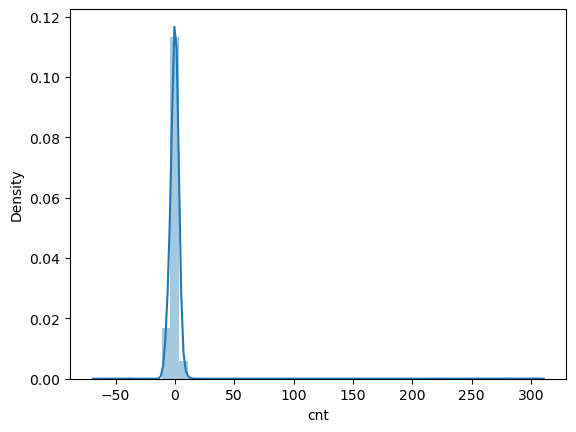

In [152]:
error = y_test - lr_pred  # assign error value
sns.distplot(error,kde=True)  # plot the error value

**Conclusion**
* Linear Regression model gives the generalize model. It's testing r2_score is 0.9958 and training r2_score is 0.9830.
* Linear Regression model not required the hyperparameter tuning.
* Error also follow the normal distribution.

### SVM : Support Vector Machine

In [153]:
from sklearn.svm import SVR  # import SVR

In [154]:
svr = SVR()  # create an instance object
svr.fit(x_train,y_train)  # train the model

SVR()

In [155]:
svr_pred = svr.predict(x_test)   # predict the data

In [156]:
r2_2 = r2_score(y_test,svr_pred)   # check the model performance
r2_2

0.979954130489744

In [157]:
mse2 = mean_squared_error(y_test,svr_pred)  # check mean squared error
mse2

640.6897309996165

In [158]:
mae2 = mean_absolute_error(y_test,svr_pred)  # check mean absolute error
mae2

5.2668889214456796

In [159]:
y_tr_svr = svr.predict(x_train)  # predict the training data
r2_score(y_train,y_tr_svr)  # check the model performance

0.9744202328185115

<Axes: xlabel='cnt', ylabel='Density'>

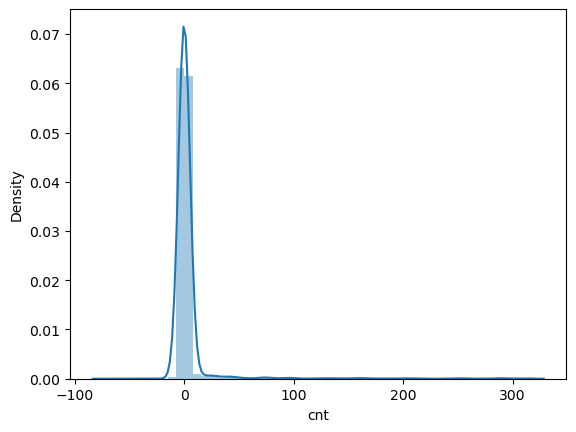

In [160]:
error = y_test - svr_pred  # assign error value
sns.distplot(error, kde=True)  # plot the error value

**Conclusion**
* SVM model gives the generalize model. It's testing r2_score is 0.9799 and training r2_score is 0.9744.
* SVM model not required the hyperparameter tuning.
* Error also follow the normal distribution.

### Decision Tree Algorithm

In [161]:
from sklearn.tree import DecisionTreeRegressor  # import DecisionTreeRegressor

In [162]:
# create an instance object
dt = DecisionTreeRegressor(random_state=40,criterion='squared_error',splitter='best',max_depth=10,min_samples_split=7,min_samples_leaf=6)
dt.fit(x_train,y_train) # train the model

DecisionTreeRegressor(max_depth=10, min_samples_leaf=6, min_samples_split=7,
                      random_state=40)

In [163]:
dt_pred = dt.predict(x_test) # predict the data

In [164]:
r2_3 = r2_score(y_test,dt_pred)  # check the model performance
r2_3

0.9951416037851801

In [165]:
mse3 = mean_squared_error(y_test,dt_pred)  # check mean squared error
mse3

155.28009709780517

In [166]:
mae3 = mean_absolute_error(y_test,dt_pred)  # check mean absolute error
mae3

4.057386360928242

In [167]:
y_tr_dt = dt.predict(x_train)  # predict the training data
r2_score(y_train,y_tr_dt)  # check the model performance

0.9922242356989633

<Axes: xlabel='cnt', ylabel='Density'>

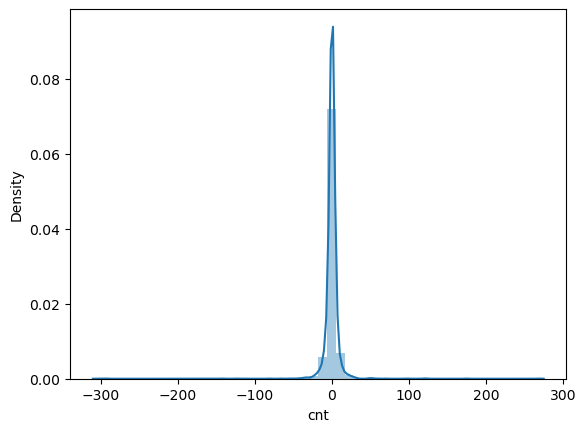

In [168]:
error = y_test - dt_pred  # assign error value
sns.distplot(error,kde=True)  # plot the error value

**Conclusion**
* Decision Tree model gives the generalize model. It's testing r2_score is 0.9951 and training r2_score is 0.9922.
* Decision Tree model not required the hyperparameter tuning.
* Error also follow the normal distribution.

### Bagging Algorithm

In [169]:
from sklearn.ensemble import BaggingRegressor  # import BaggingRegressor

In [170]:
bg = BaggingRegressor(random_state=24)  # create an instance object
bg.fit(x_train,y_train)  # train the model

BaggingRegressor(random_state=24)

In [171]:
bg_pred = bg.predict(x_test)  # predict the data

In [172]:
r2_4 = r2_score(y_test,bg_pred) # check the model performance
r2_4

0.9974188628701891

In [173]:
mse4 = mean_squared_error(y_test,bg_pred)  # check mean squared error
mse4

82.4961996547756

In [174]:
mae4 = mean_absolute_error(y_test,bg_pred)  # check mean absolute error
mae4

1.7997986191024167

In [175]:
y_tr_bg = bg.predict(x_train)  # predict the training data
r2_score(y_train, y_tr_bg) # check the model performance

0.9983742017117154

<Axes: xlabel='cnt', ylabel='Density'>

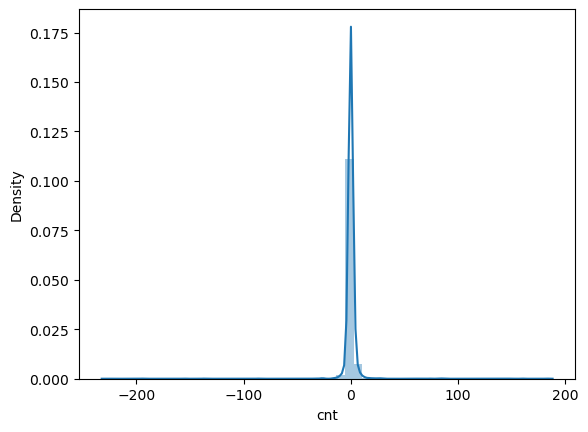

In [176]:
error = y_test - bg_pred  # assign error value
sns.distplot(error, kde=True)  # plot the error value

**Conclusion**
* Bagging Algorithm gives the generalize model. It's testing r2_score is 0.9974 and training r2_score is 0.9983.
* Bagging Algorithm not required the hyperparameter tuning.
* Error also follow the normal distribution.

### Random Forest Algorithm

In [177]:
from sklearn.ensemble import RandomForestRegressor  # import RandomForestRegressor

In [178]:
rf = RandomForestRegressor(n_estimators=200,random_state = 41)  # create an instance object
rf.fit(x_train,y_train)  # train the model

RandomForestRegressor(n_estimators=200, random_state=41)

In [179]:
rf_pred = rf.predict(x_test)  # predict the data

In [180]:
r2_5 = r2_score(y_test,rf_pred)  # check the model performance
r2_5

0.9968008644138958

In [181]:
mse5 = mean_squared_error(y_test,rf_pred)  # check mean squared error
mse5

102.24816224827389

In [182]:
mae5 = mean_absolute_error(y_test,rf_pred)  # check mean absolute error
mae5

1.5752373417721524

In [183]:
y_tr_rf = rf.predict(x_train)  # predict the training data
r2_score(y_train,y_tr_rf) # check the model performance

0.9989199643804215

<Axes: xlabel='cnt', ylabel='Density'>

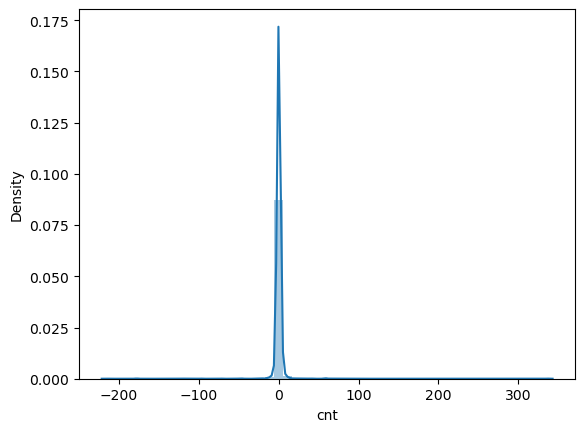

In [184]:
error = y_test - rf_pred # assign error value
sns.distplot(error, kde=True) # plot the error value

**Conclusion**
* Random Forest Algorithm gives the generalize model. It's testing r2_score is 0.9968 and training r2_score is 0.9989.
* Random Forest Algorithm not required the hyperparameter tuning.
* Error also follow the normal distribution.

### Gradient Boosting Algorithm

In [185]:
from sklearn.ensemble import GradientBoostingRegressor  # import GradientBoostingRegressor

In [186]:
gb = GradientBoostingRegressor()  # create an instance object
gb.fit(x_train,y_train)  # train the model

GradientBoostingRegressor()

In [187]:
gb_pred = gb.predict(x_test)  # predict the data

In [188]:
r2_6 = r2_score(y_test,gb_pred)  # check the model performance
r2_6

0.9969893861661174

In [189]:
mse6 = mean_squared_error(y_test,gb_pred)  # check mean squared error
mse6

96.22278377034583

In [190]:
mae6 = mean_absolute_error(y_test,gb_pred)  # check mean absolute error
mae6

4.416557698063033

In [191]:
y_tr_gb = gb.predict(x_train)  # predict the training data
r2_score(y_train,y_tr_gb) # check the model performance

0.9962358990937821

<Axes: xlabel='cnt', ylabel='Density'>

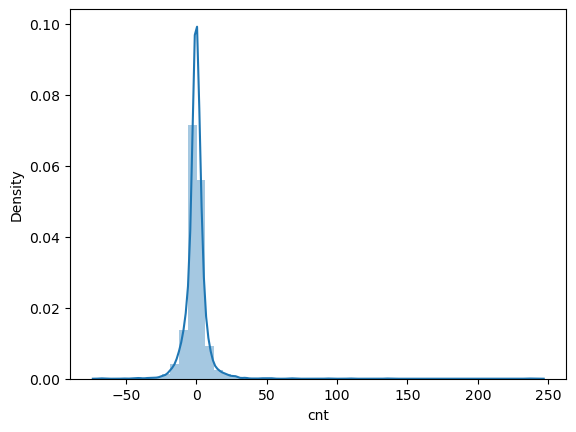

In [192]:
error = y_test - gb_pred # assign error value
sns.distplot(error, kde=True) # plot the error value

**Conclusion**
* Gradient Boosting Algorithm gives the generalize model. It's testing r2_score is 0.9970 and training r2_score is 0.9962.
* Gradient Boosting Algorithm not required the hyperparameter tuning.
* Error also follow the normal distribution.

### eXtreme Gradient Boosting

In [193]:
from xgboost import XGBRegressor  # import XGBRegressor

In [194]:
xgb = XGBRegressor(n_estimators=120,learning_rate=0.1,max_depth=5,random_state=33)  # create an instance object
xgb.fit(x_train, y_train) # train the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=120, n_jobs=None,
             num_parallel_tree=None, random_state=33, ...)

In [195]:
xgb_pred = xgb.predict(x_test)  # predict the data

In [196]:
r2_7 = r2_score(y_test,xgb_pred) # check the model performance
r2_7

0.9959297083597823

In [197]:
mse7 = mean_squared_error(y_test,xgb_pred) # check mean squared error
mse7

130.0913414969019

In [198]:
mae7 = mean_absolute_error(y_test,xgb_pred) # check mean absolute error
mae7

2.755239910682957

In [199]:
y_tr_xgb = xgb.predict(x_train)  # predict the training data
r2_score(y_train,y_tr_xgb) # check the model performance

0.998667760873871

<Axes: xlabel='cnt', ylabel='Density'>

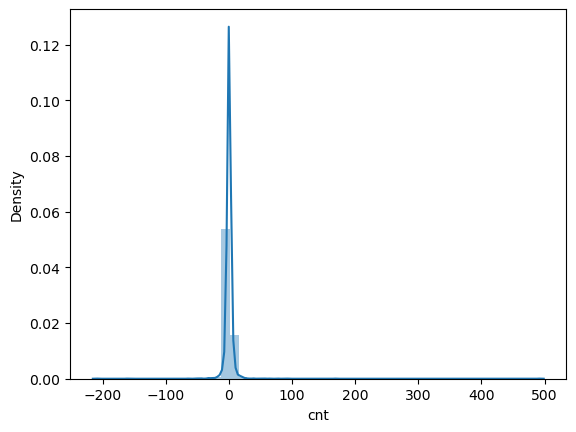

In [200]:
error = y_test - xgb_pred # assign error value
sns.distplot(error, kde=True) # plot the error value

**Conclusion**
* XGBREgressor model gives the generalize model. It's testing r2_score is 0.9959 and training r2_score is 0.9986.
* XGBREgressor model not required the hyperparameter tuning.
* Error also follow the normal distribution.

### ANN : Artificial Neural Networks

In [201]:
from sklearn.neural_network import MLPRegressor  # import MLPRegressor

In [202]:
ann = MLPRegressor() # create an instance object
ann.fit(x_train,y_train)  # train the model

MLPRegressor()

In [203]:
ann_pred = ann.predict(x_test) # predict the data

In [204]:
r2_8 = r2_score(y_test,ann_pred)  # check the model performance
r2_8

0.995623929880993

In [205]:
mse8 = mean_squared_error(y_test,ann_pred) # check mean squared error
mse8

139.86438382967614

In [206]:
mae8 = mean_absolute_error(y_test,ann_pred)  # check mean absolute error
mae8

3.0292464355381097

In [207]:
y_tr_ann = ann.predict(x_train) # predict the training data
r2_score(y_train,y_tr_ann) # check the model performance

0.9840170567834323

<Axes: xlabel='cnt', ylabel='Density'>

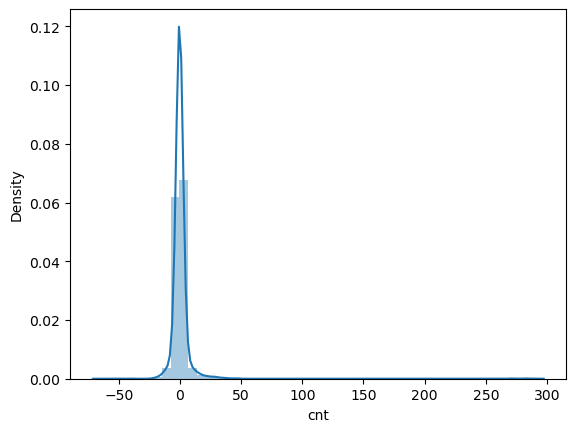

In [208]:
error = y_test - ann_pred # assign error value  
sns.distplot(error, kde=True)  # plot the error value

**Conclusion**
* ANN Algorithm gives the generalize model. It's testing r2_score is 0.9956 and training r2_score is 0.9840.
* ANN model not required the hyperparameter tuning.
* Error also follow the normal distribution.

### AdaBoost Algorithm

In [209]:
from sklearn.ensemble import AdaBoostRegressor  # import AdaBoostRegressor

In [210]:
ab = AdaBoostRegressor()  # create an instance object
ab.fit(x_train,y_train)  # train the model

AdaBoostRegressor()

In [211]:
ab_pred = ab.predict(x_test)  # predict the data

In [212]:
r2_9 = r2_score(y_test,ab_pred)  # check the model performance
r2_9

0.9575345080765871

In [213]:
mse9 = mean_squared_error(y_test,ab_pred)  # check mean squared error
mse9

1357.2474161451485

In [214]:
mae9 = mean_absolute_error(y_test,ab_pred) # check mean absolute error
mae9

23.80665419871897

In [215]:
y_tr_ab = ab.predict(x_train)  # predict the training data
r2_score(y_train,y_tr_ab) # check the model performance

0.9541033930638702

<Axes: xlabel='cnt', ylabel='Density'>

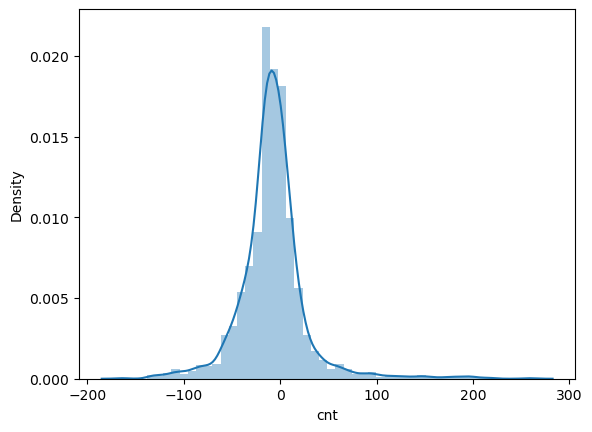

In [216]:
error = y_test - ab_pred  # assign error value
sns.distplot(error, kde=True)  # plot the error value

**Conclusion**
* AdaBoost Algorithm gives the generalize model. It's testing r2_score is 0.9575 and training r2_score is 0.9541.
* AdaBoost Algorithm not required the hyperparameter tuning.
* Error also follow the normal distribution.

### KNN : K-Nearest Neighbors

In [217]:
from sklearn.neighbors import KNeighborsRegressor  # import KNeighborsRegressor

In [218]:
knn = KNeighborsRegressor(leaf_size=90,n_jobs=-1)  # create an instance object
knn.fit(x_train,y_train)   # train the model

KNeighborsRegressor(leaf_size=90, n_jobs=-1)

In [219]:
knn_pred = knn.predict(x_test)  # predict the data

In [220]:
r2_10 = r2_score(y_test,knn_pred)  # check the model performance
r2_10

0.9956652886486885

In [221]:
mse10 = mean_squared_error(y_test,knn_pred)  # check mean squared error
mse10

138.5425086306099

In [222]:
mae10 = mean_absolute_error(y_test,knn_pred)  # check mean absolute error
mae10

2.8220943613348672

In [223]:
y_tr_pred = knn.predict(x_train)  # predict the training data
r2_score(y_train,y_tr_pred) # check the model performance

0.9914304739537383

<Axes: xlabel='cnt', ylabel='Density'>

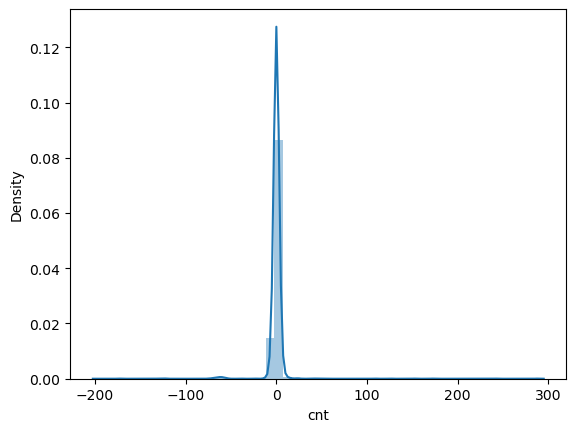

In [224]:
error = y_test - knn_pred  # check the error value
sns.distplot(error, kde=True)  # plot the  error value

**Conclusion**
* KNN Algorithm gives the generalize model. It's testing r2_score is 0.9956 and training r2_score is 0.9914.
* KNN Algorithm not required the hyperparameter tuning.
* Error also follow the normal distribution.

## Model Comparition Report

In [228]:
# make a table for all algorithm's performance and error
score = pd.DataFrame({"Model":["Linear Regression","SVM","Decision Tree Regressor","Bagging",
                        "Random Forest Regressor","Gradient Boosting","XGB Regressor","ANN","AdaBoost Regressor",'KNN'],
                     "R2_score":[r2_1*100,r2_2*100,r2_3*100,r2_4*100,r2_5*100,r2_6*100,r2_7*100,r2_8*100,r2_9*100,r2_10*100],
                     "MSE":[mse1,mse2,mse3,mse4,mse5,mse6,mse7,mse8,mse9,mse10],
                     "MAE":[mae1,mae2,mae3,mae4,mae5,mae6,mae7,mae8,mae9,mae10]})

In [229]:
score

Model   R2_score          MSE        MAE
0        Linear Regression  99.582752   133.357557   2.515877
1                      SVM  97.995413   640.689731   5.266889
2  Decision Tree Regressor  99.514160   155.280097   4.057386
3                  Bagging  99.741886    82.496200   1.799799
4  Random Forest Regressor  99.680086   102.248162   1.575237
5        Gradient Boosting  99.698939    96.222784   4.416558
6            XGB Regressor  99.592971   130.091341   2.755240
7                      ANN  99.562393   139.864384   3.029246
8       AdaBoost Regressor  95.753451  1357.247416  23.806654
9                      KNN  99.566529   138.542509   2.822094

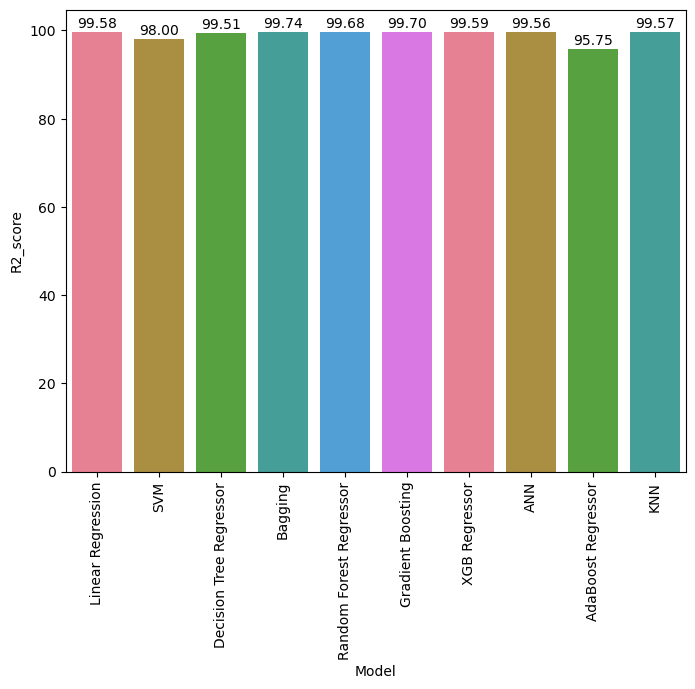

In [230]:
# use for All model performance show in barplot graph
palette = sns.color_palette("husl") # define the color for barplot 
plt.figure(figsize=(8, 6)) # define the plot size
plt.xticks(rotation = 90) # rotation x ticks
a = sns.barplot(x=score.Model, y=score.R2_score, data=score, palette=palette) # create the barplot

for index, value in enumerate(score['R2_score']): # show indivisual bar values show
    a.text(index, value + 1, f'{value:.2f}', ha='center')

### **Final Conclusion :-**

* I have used 10 Algorithms like Linear Regression, SVM, Decision Tree, Bagging Algorithm, Random Forest, Gradient Boosting, XGB Regressor, ANN, AdaBoost Regressor and KNN.
* all algorithms gives the generalize model.
* Best Algorithm is BaggingRegressor, which gives highest r2_score 0.9974 and mean absolute error 1.79 and less mean squared error 82.5.
* Most of algorithm provides the model performance greater than 0.99.
  

## Report on Challenges Faced

* The analysis of the bike rental dataset reveals that it contains 17339 entries and 17 columns, with 16 input features and 1 target variable.
* Among the columns, there are 4 float data types , 12 int data types and 1 object type, while one column is incorrectly classified as an object instead of a datetime type.
* The dataset presents challenges due to the presence of multiple outliers across various columns and does not exhibit a normal distribution for all features.
* Additionally, the feature selection process identified strong relationships among several columns, leading to the decision to drop some of them.
*  Overall, these insights highlight the importance of careful data preprocessing and model optimization in improving predictive performance.|

## Cross Validation Model :

In [231]:
from sklearn.model_selection import cross_val_score #import cross_val_score model

In [232]:
score = cross_val_score(rf,x,y,cv=5,scoring='r2')  #check the model performance by using cross validation
score

array([0.99931595, 0.9992089 , 0.99920818, 0.98616768, 0.97914802])

In [233]:
score.mean() # check the average of different model

0.9926097477484775

### Save the Model

In [234]:
import pickle  #used for save the model

In [235]:
with open('bike_hour.pkl','wb') as f : # save the file name
    pickle.dump(bg,f) #dump the bg model 

In [236]:
with open('bike_hour.pkl','rb') as f : # call the file
    model = pickle.load(f)  # load the file

In [237]:
x.head()  # shows the first 5 rows

season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp   hum  \
0       1   0     1   0        0        6           0           1  0.24  0.81   
1       1   0     1   1        0        6           0           1  0.22  0.80   
2       1   0     1   2        0        6           0           1  0.22  0.80   
3       1   0     1   3        0        6           0           1  0.24  0.75   
4       1   0     1   4        0        6           0           1  0.24  0.75   

   windspeed  casual  registered  day  
0        0.0       3          13    1  
1        0.0       8          32    1  
2        0.0       5          27    1  
3        0.0       3          10    1  
4        0.0       0           1    1

In [238]:
y.head()  # shows the first 5 rows

0    16
1    40
2    32
3    13
4     1
Name: cnt, dtype: int64

In [240]:
# predict the data
prediction = model.predict([[1,0,1,0,0,6,0,1,0.24,0.81,0.0,3,13,1]])
prediction

array([16.])